In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

from PIL import Image

import os
import cv2
from six.moves import cPickle as pickle

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.ndimage import imread
from scipy.misc import toimage

from skimage import data, io, filters

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier

from os import listdir, makedirs
from os.path import isfile, join, exists

# Training Data

In [14]:
train_mat = loadmat('data/train_32x32.mat')['X']
train_labels = loadmat('data/train_32x32.mat')['y']
shape_train = train_mat.shape

# Testing Data

In [15]:
test_mat = loadmat('data/test_32x32.mat')['X']
test_labels = loadmat('data/test_32x32.mat')['y']
shape_test = test_mat.shape

# Convert images to grayscale

In [16]:
def img(ind, which_set):
    if which_set == 'test':
        return test_mat[:,:,:,ind]
    else:
        return train_mat[:,:,:,ind]

In [18]:
test_gray32_path = 'data/test/gray32_gray'
train_gray32_path = 'data/train/gray32_gray'

In [21]:
def make_grayscale(gray_path, img_set):
    
    # if output directory doesn't exist, make it
    if not exists(gray_path):
        makedirs(gray_path)
        
    # get length of image set
    _, _, _, mat_len = img_set.shape
    
    for i in range(mat_len):
        im = Image.fromarray(img(i, 'train'))
        im = im.convert('L') #makes it greyscale
        im.save('data/test/{0}.png'.format(str(i)))

In [23]:
# make_grayscale(test_gray32_path, test_mat)
make_grayscale(train_gray32_path, train_mat)

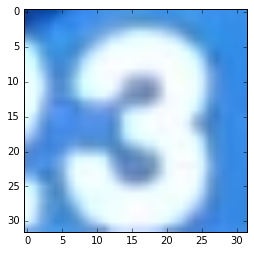

In [28]:
import matplotlib.image as mpimg
imgplot = plt.imshow(img(3,'train'))

# Load images

In [1]:
# return list of image names from path specified
#def get_imgs(dir_path):
#    return [f for f in listdir(dir_path) if isfile(join(dir_path, f)) if f.endswith('.png')]

In [25]:
import scipy.io as sio

SVHN_train_RGB = sio.loadmat('data/train_32x32.mat', squeeze_me=True, struct_as_record=False)
SVHN_test_RGB = sio.loadmat('data/test_32x32.mat', squeeze_me=True, struct_as_record=False)

In [27]:
SVHN_train = (np.sum(SVHN_train_RGB['X'],2)/3)
SVHN_test = (np.sum(SVHN_test_RGB['X'],2)/3)

In [28]:
"""
Converting Labels to One Hot Encoding and Image Matrix to favourable dimensions
"""
def reformat(data, Y):
    xtrain = []
    trainLen = data.shape[3]
    for x in range(trainLen):
        xtrain.append(data[:,:,:,x])
    xtrain = np.asarray(xtrain)
    Ytr=[]
    for el in Y:
        temp=np.zeros(10)
        if el==10:
            temp[0]=1
        elif el==1:
            temp[1]=1
        elif el==2:
            temp[2]=1
        elif el==3:
            temp[3]=1
        elif el==4:
            temp[4]=1
        elif el==5:
            temp[5]=1
        elif el==6:
            temp[6]=1
        elif el==7:
            temp[7]=1
        elif el==8:
            temp[8]=1
        elif el==9:
            temp[9]=1
        Ytr.append(temp)
    return xtrain, np.asarray(Ytr)

train_data, train_labels = reformat(train_data, train_labels)
test_data, test_labels = reformat(test_data, test_labels)

NameError: name 'train_data' is not defined

In [30]:
(dim1,dim2,nImages)=SVHN_train.shape
SVHN_train_V = np.zeros((nImages,dim1*dim2))
for i in range(0,nImages):
    SVHN_train_V[i,:]=SVHN_train[:,:,i].flatten()

In [31]:
SVHN_train_V.shape

(73257, 1024)

# Support Vector Machine

In [ ]:
svm_clf = SVC(gamma=0.001, C=100.)
svm_mdl = svm_clf.fit(x_train2d[:-1], y_train[:-1])  

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, svm_mdl.predict(x_test2d))

# Video

In [5]:
_ = '''
cap = cv2.VideoCapture(0) # number is the numbered sequence for your video input (if you have multiple)
                          # you can also replace the 0 with a file name and load a file

# output to file
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,480)) 

while True:
    ret, frame = cap.read()
    
    # covert to grayscale
    grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # write to file
    #out.write(frame)
    
    cv2.imshow('frame', frame) #normal
    cv2.imshow('gray', grey) #grayscale
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.DestroyAllWindows()
'''

# Rectangle

In [6]:
            #img obj, start, stop,      color,       line-width  
#cv2.rectangle(img, (15,25), (150,150), (255,255,255), 5)

In [33]:
train_data = loadmat('data/train_32x32.mat', variable_names='X').get('X')
train_labels = loadmat('data/train_32x32.mat', variable_names='y').get('y')
test_data = loadmat('data/test_32x32.mat', variable_names='X').get('X')
test_labels = loadmat('data/test_32x32.mat', variable_names='y').get('y')
extra_data = loadmat('data/extra_32x32.mat', variable_names='X').get('X')
extra_labels = loadmat('data/extra_32x32.mat', variable_names='y').get('y')

print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)
print(extra_data.shape, extra_labels.shape)

(32, 32, 3, 73257) (73257, 1)
(32, 32, 3, 26032) (26032, 1)
(32, 32, 3, 531131) (531131, 1)


In [34]:
train_labels[train_labels == 10] = 0
test_labels[test_labels == 10] = 0
extra_labels[extra_labels == 10] = 0

In [35]:
import random

random.seed()

n_labels = 10
valid_index = []
valid_index2 = []
train_index = []
train_index2 = []
for i in np.arange(n_labels):
    valid_index.extend(np.where(train_labels[:,0] == (i))[0][:400].tolist())
    train_index.extend(np.where(train_labels[:,0] == (i))[0][400:].tolist())
    valid_index2.extend(np.where(extra_labels[:,0] == (i))[0][:200].tolist())
    train_index2.extend(np.where(extra_labels[:,0] == (i))[0][200:].tolist())

random.shuffle(valid_index)
random.shuffle(train_index)
random.shuffle(valid_index2)
random.shuffle(train_index2)

valid_data = np.concatenate((extra_data[:,:,:,valid_index2], train_data[:,:,:,valid_index]), axis=3).transpose((3,0,1,2))
valid_labels = np.concatenate((extra_labels[valid_index2,:], train_labels[valid_index,:]), axis=0)[:,0]
train_data_t = np.concatenate((extra_data[:,:,:,train_index2], train_data[:,:,:,train_index]), axis=3).transpose((3,0,1,2))
train_labels_t = np.concatenate((extra_labels[train_index2,:], train_labels[train_index,:]), axis=0)[:,0]
test_data = test_data.transpose((3,0,1,2))
test_labels = test_labels[:,0]

print(train_data_t.shape, train_labels_t.shape)
print(test_data.shape, test_labels.shape)
print(valid_data.shape, valid_labels.shape)

(598388, 32, 32, 3) (598388,)
(26032, 32, 32, 3) (26032,)
(6000, 32, 32, 3) (6000,)


In [36]:
image_size = 32  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def im2gray(image):
    '''Normalize images'''
    image = image.astype(float)
    # Use the Conversion Method in This Paper:
    # [http://www.eyemaginary.com/Rendering/TurnColorsGray.pdf]
    image_gray = np.dot(image, [[0.2989],[0.5870],[0.1140]])
    return image_gray

train_data_c = im2gray(train_data_t)[:,:,:,0]
test_data_c = im2gray(test_data)[:,:,:,0]
valid_data_c = im2gray(valid_data)[:,:,:,0]

print(train_data_c.shape, train_labels_t.shape)
print(test_data_c.shape, test_labels.shape)
print(valid_data_c.shape, valid_labels.shape)

(598388, 32, 32) (598388,)
(26032, 32, 32) (26032,)
(6000, 32, 32) (6000,)


In [37]:
def GCN(image, min_divisor=1e-4):
    """Global Contrast Normalization"""
    
    imsize = image.shape[0]
    mean = np.mean(image, axis=(1,2), dtype=float)
    std = np.std(image, axis=(1,2), dtype=float, ddof=1)
    std[std < min_divisor] = 1.
    image_GCN = np.zeros(image.shape, dtype=float)
    
    for i in np.arange(imsize):
        image_GCN[i,:,:] = (image[i,:,:] - mean[i]) / std[i]
        
    return image_GCN

train_data_GCN = GCN(train_data_c)
test_data_GCN = GCN(test_data_c)
valid_data_GCN = GCN(valid_data_c)

print(train_data_GCN.shape, train_labels_t.shape)
print(test_data_GCN.shape, test_labels.shape)
print(valid_data_GCN.shape, valid_labels.shape)

(598388, 32, 32) (598388,)
(26032, 32, 32) (26032,)
(6000, 32, 32) (6000,)


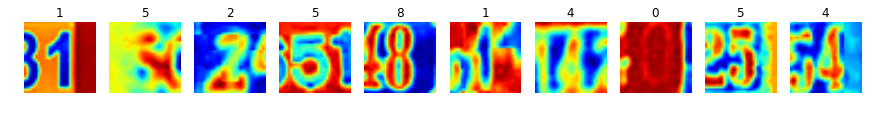

In [38]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)
f, ax = plt.subplots(nrows=1, ncols=10)

for i, j in enumerate(np.random.randint(0, train_labels_t.shape[0], size=10)):
    ax[i].axis('off')
    ax[i].set_title(train_labels_t[j], loc='center')
    ax[i].imshow(train_data_GCN[j,:,:])

In [45]:
pickle_file = 'SVHN.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    #'train_dataset': train_data_GCN,
    'train_labels': train_labels_t,
    'valid_dataset': valid_data_GCN,
    'valid_labels': valid_labels,
    'test_dataset': test_data_GCN,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 263037004


In [46]:
pickle_file = 'SVHN1.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset1': train_data_GCN[:200000],
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 1638400185


In [47]:
pickle_file = 'SVHN2.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset2': train_data_GCN[200000:400000],
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 1638400185


In [48]:


pickle_file = 'SVHN3.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset3': train_data_GCN[400000:],
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)



Compressed pickle size: 1625194681


In [51]:
# logistic regression classifier
clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, shuffle=True, verbose=0, 
                    n_jobs=4, random_state=None, learning_rate='optimal')

clf.fit(train_data_c.reshape(train_data_GCN.shape[0],-1), train_labels_t)

train_prediction = clf.predict(train_data_GCN.reshape(train_data_GCN.shape[0],-1))
valid_prediction = clf.predict(valid_data_GCN.reshape(valid_data_GCN.shape[0],-1))

print('Training score is', clf.score(train_data_GCN.reshape(train_data_GCN.shape[0],-1), train_labels_t))
print('Validation score is', clf.score(valid_data_GCN.reshape(valid_data_GCN.shape[0],-1), valid_labels))

print('Classification report of training data:\n', classification_report(train_labels_t, train_prediction))
print('Confusion Matrix of training data:\n', confusion_matrix(train_labels_t, train_prediction))

print('Classification report of validation data:\n', classification_report(valid_labels, valid_prediction))
print('Confusion Matrix of validation data:\n', confusion_matrix(valid_labels, valid_prediction))

Training score is 0.169306536896
Validation score is 0.155333333333
Classification report of training data:
              precision    recall  f1-score   support

          0       0.20      0.06      0.10     49898
          1       0.29      0.10      0.15    103821
          2       0.37      0.23      0.28     84725
          3       0.18      0.12      0.14     68662
          4       0.20      0.26      0.23     57491
          5       0.17      0.10      0.13     59772
          6       0.14      0.21      0.17     46709
          7       0.12      0.37      0.18     48992
          8       0.08      0.16      0.11     39803
          9       0.12      0.14      0.13     38515

avg / total       0.21      0.17      0.17    598388

Confusion Matrix of training data:
 [[ 3108  3769  2580  2668  6252   664  7885 12485  6377  4110]
 [ 3075 10028  6282  9250 13877  8489  9065 21652 12507  9596]
 [ 1418  3108 19072  5934  8340  2751  8447 18923 11226  5506]
 [  862  2942  4477  8330  

# SVM

In [ ]:
svm_clf = SVC(gamma=0.001, C=100.)
svm_mdl = svm_clf.fit(train_data_c.reshape(train_data_GCN.shape[0],-1), train_labels_t)  lo

train_prediction = svm_mdl.predict(train_data_GCN.reshape(train_data_GCN.shape[0],-1))
valid_prediction = svm_mdl.predict(valid_data_GCN.reshape(valid_data_GCN.shape[0],-1))